In [1]:
import numpy  as np
import pandas as pd
import shap
import matplotlib.pyplot as plt

In [2]:
import sklearn
import warnings
warnings.filterwarnings("ignore")

https://coderzcolumn.com/tutorials/machine-learning/shap-explain-machine-learning-model-predictions-using-game-theoretic-approach

In [3]:
from sklearn.datasets import load_boston

boston = load_boston()

for line in boston.DESCR.split("\n")[5:28]:
    print(line)

boston_df = pd.DataFrame(data=boston.data, columns = boston.feature_names)
boston_df["Price"] = boston.target
boston_df.head()

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Divide Dataset Into Train/Test Sets, Train Model, and Evaluate Model

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X, Y = boston.data, boston.target

print("Total Data Size : ", X.shape, Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.85, test_size=0.15, random_state=123, shuffle=True)

print("Train/Test Sizes : ",X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

print()
print("Test  R^2 Score : ", lin_reg.score(X_test, Y_test))
print("Train R^2 Score : ", lin_reg.score(X_train, Y_train))

Total Data Size :  (506, 13) (506,)
Train/Test Sizes :  (430, 13) (76, 13) (430,) (76,)

Test  R^2 Score :  0.6675760904888193
Train R^2 Score :  0.7524778368022296


In [5]:
import shap

shap.initjs()

In [7]:
lin_reg_explainer1 = shap.LinearExplainer(lin_reg, X_train)

In [8]:
sample_idx = 0

shap_vals = lin_reg_explainer1.shap_values(X_test[sample_idx])

print("Base Value : ", lin_reg_explainer1.expected_value)
print()
print("Shap Values for Sample %d : "%sample_idx, shap_vals)
print("\n")
print("Prediction From Model                            : ", lin_reg.predict(X_test[sample_idx].reshape(1,-1))[0])
print("Prediction From Adding SHAP Values to Base Value : ", lin_reg_explainer1.expected_value + shap_vals.sum())


Base Value :  21.025384194765646

Shap Values for Sample 0 :  [-4.94799946 -0.55072121  0.36812662 -0.0482649  -0.69645417 -1.88755327
 -0.06792962  3.42385064  4.1690345  -3.23632615 -1.35342482 -2.78930191
  1.94715348]


Prediction From Model                            :  15.35557393538673
Prediction From Adding SHAP Values to Base Value :  15.35557393538673


In [9]:
lin_reg_explainer2 = shap.LinearExplainer(lin_reg, X_train, feature_perturbation="correlation_dependent")

Estimating transforms:   0%|          | 0/1000 [00:00<?, ?it/s]

In [10]:
sample_idx = 0

shap_vals = lin_reg_explainer2.shap_values(X_test[sample_idx].reshape(1,-1))[0]

print("Base Value : ", lin_reg_explainer2.expected_value)
print()
print("Shap Values for Sample %d : "%sample_idx, shap_vals)
print("\n")
print("Prediction From Model                            : ", lin_reg.predict(X_test[sample_idx].reshape(1,-1))[0])
print("Prediction From Adding SHAP Values to Base Value : ", lin_reg_explainer2.expected_value + shap_vals.sum())

Base Value :  22.35604651162791

Shap Values for Sample 0 :  [-6.67280394 -0.07473697 -0.39342937  0.01361884  1.1666495  -3.64254087
 -0.39079523  0.3764101  -1.04348799 -0.90906738 -0.52500994 -3.98738958
  9.08211025]


Prediction From Model                            :  15.35557393538673
Prediction From Adding SHAP Values to Base Value :  15.35557393538663


## Barplot

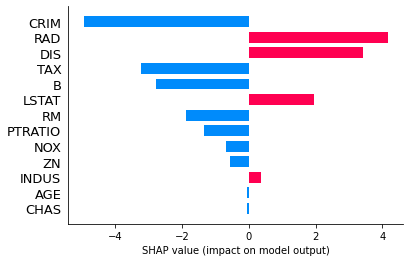

In [11]:
shap.bar_plot(lin_reg_explainer1.shap_values(X_test[0]),
              feature_names=boston.feature_names,
              max_display=len(boston.feature_names))

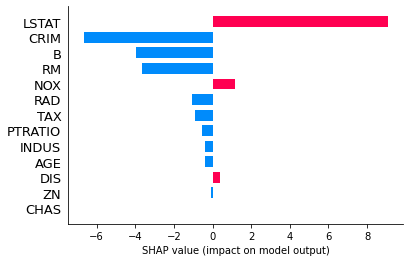

In [12]:
shap.bar_plot(lin_reg_explainer2.shap_values(X_test[0].reshape(1,-1))[0],
              feature_names=boston.feature_names,
              max_display=len(boston.feature_names))

## Waterfall plot

In [17]:
shap.waterfall_plot(lin_reg_explainer1.expected_value,
                    #lin_reg_explainer1.shap_values(X_test[0]),
                    #feature_names=boston.feature_names,
                    #max_display=len(boston.feature_names)
                    )

AttributeError: 'numpy.float64' object has no attribute 'base_values'

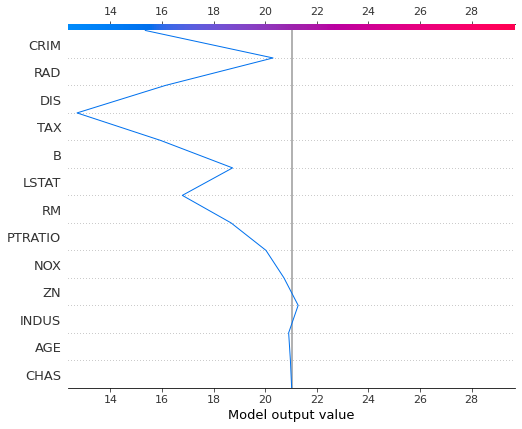

In [18]:
shap.decision_plot(lin_reg_explainer1.expected_value,
                   lin_reg_explainer1.shap_values(X_test[0]),
                   feature_names=boston.feature_names.tolist(),
                   )


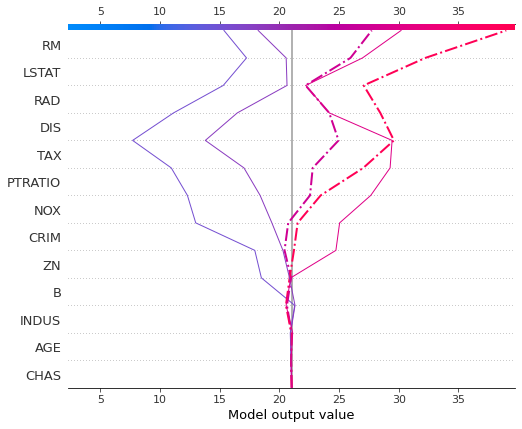

In [19]:
shap.decision_plot(lin_reg_explainer1.expected_value,
                   lin_reg_explainer1.shap_values(X_test[0:5]),
                   feature_names=boston.feature_names.tolist(),
                   highlight=[1, 2],
                   )

## Dependence Plot

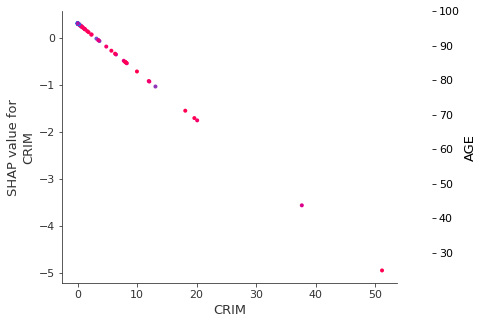

In [20]:
shap.dependence_plot("CRIM",
                     lin_reg_explainer1.shap_values(X_test),
                     features=X_test,
                     feature_names=boston.feature_names,
                     )

In [22]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

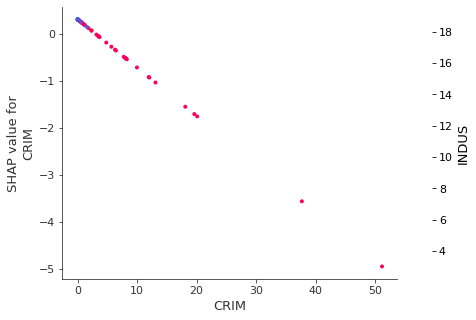

In [26]:
shap.dependence_plot("CRIM",
                     lin_reg_explainer1.shap_values(X_test),
                     features=X_test,
                     feature_names=boston.feature_names,
                     interaction_index=2
                     )

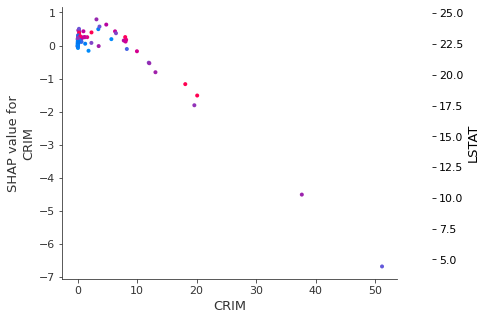

In [21]:
shap.dependence_plot("CRIM",
                     lin_reg_explainer2.shap_values(X_test),
                     features=X_test,
                     feature_names=boston.feature_names,
                     )

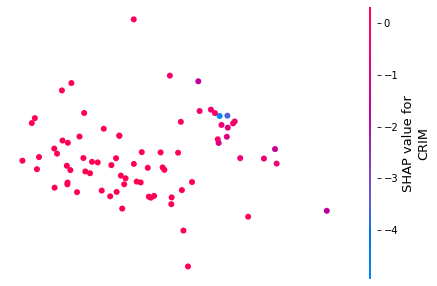

In [27]:
shap.embedding_plot("CRIM",
                    lin_reg_explainer1.shap_values(X_test),
                    feature_names=boston.feature_names)

In [28]:
shap.force_plot(lin_reg_explainer1.expected_value,
                lin_reg_explainer1.shap_values(X_test[0]),
                feature_names=boston.feature_names,
                out_names="Price($)")

In [29]:
shap.force_plot(lin_reg_explainer1.expected_value,
                lin_reg_explainer1.shap_values(X_test[0:10]),
                feature_names=boston.feature_names,
                out_names="Price($)", figsize=(25,3),
                link="identity")

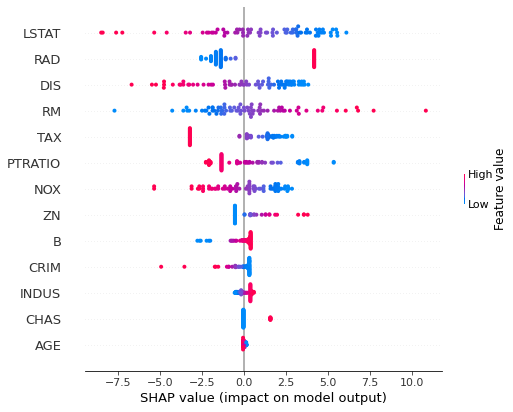

In [30]:
shap.summary_plot(lin_reg_explainer1.shap_values(X_test),
                  features = X_test,
                  feature_names=boston.feature_names)